<a href="https://colab.research.google.com/github/Aaaron1995/opencv_class2022/blob/main/class1012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

學習目標：
1. 開啟圖片檔
2. 使用指令生成圖片
3. 圖片加字
4. 使用指令生成影片
5. 將影片影格拆解


# 使用OpenCV開檔
>OpenCV的全稱是Open Source Computer Vision Library，是一個跨平台的電腦視覺庫。可用於開發即時的圖像處理、電腦視覺以及圖型識別程式。\
>OpenCV是由英特爾公司發起並參與開發，以BSD授權條款授權發行，可以在商業和研究領域中免費使用。
https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

In [ ]:
!pip install opencv-python 
!pip install opencv-contrib-python
!pip install numpy
!pip install Pillow

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow #在colab中打開圖片

img = cv2.imread("D1.jpg", 1)
  # 1:一般，不包含透明度
  # -1:包含透明度
  # 0:灰階
img_2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_3 = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  # cv2.COLOR_BGR2HSV BGR轉色彩空間擋
  # cv2.COLOR_BGR2GRAY 彩色轉黑白
  # cv2.COLOR_HSV2BGR 彩色空間轉BGR
  # cv2.COLOR_GRAY2BGR 黑白轉彩色 雖然有下這個指令但是看起來還會是灰色
cv2_imshow(img)
cv2_imshow(img_2)
cv2_imshow(img_3)

  # 利用shape看圖片維度
print(img.shape)
print(img_2.shape)
  # 灰階圖片會少一維
print(img_3.shape)


cv2.imwrite("D2.jpg", img_2, [cv2.IMWRITE_JPEG_QUALITY, 50])
  # 寫出圖片

# HSV
>色相 Hue、飽和度 Saturation、明度 Value\
>通常是用於計算用的圖檔

# .shape
>.shape[0]取高度\
>.shape[1]取寬度\
>.shape[2]取色彩空間通道數量\

#[cv2.IMWRITE_JPEG_QUALITY, 畫質比率]
>畫質比率=1~100

#用程式生成圖片

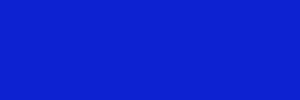

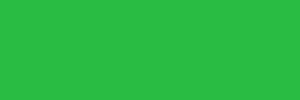

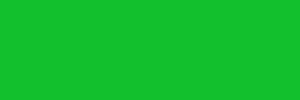

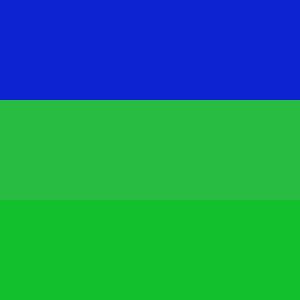

In [7]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import random

r_color = [(random.randint(0,255),random.randint(0,255),random.randint(0,255)) for i in range(0,3)]

# img = np.full((100, 300, 3), (random.randint(0,255),random.randint(0,255), 255), np.uint8)
# img2 = np.full((100, 300, 3), (random.randint(0,255), 255, random.randint(0,255)), np.uint8)
# img3 = np.full((100, 300, 3), (255, random.randint(0,255), random.randint(0,255)), np.uint8)

imgL = [np.full((100, 300, 3), r_color[i], np.uint8) for i in range(0,3)]

#畫圖指令
# a,b=0,0
# for i in imgL:
#   cv2.line(i,(a,b),(a+100,b+100),(255,255,255),2)
#   a+=100

# a,b=0,0
# for i in imgL:
#   cv2.rectangle(i,(a,b),(a+100,b+100),(255,255,255),2)
#   a+=100

# for i in imgL:
#   cv2.circle(i,(0,0),100,(255,255,255),2)

img = np.concatenate(imgL)

for i in imgL:
  cv2_imshow(i)
  print("\n")

cv2_imshow(img)

#cv2.line
>cv2.line(img, 起點, 終點, 顏色(Tuple), 線粗細)
#cv2.rectangle
>cv2.rectangle(img, 矩形左上點, 矩形右下點, 顏色(Tuple), 線粗細)\
>線粗細= -1 則會繪製實心圖形
#cv2.circle
>cv2.circle(img, 中心點, 半徑, 顏色(Tuple), 線粗細)\
>線粗細= -1 則會繪製實心圖形

#使用PIL在圖片上寫字

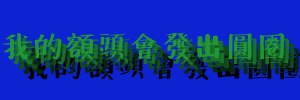

In [9]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import random
from PIL import ImageFont, ImageDraw, Image #這行很重要

img = Image.fromarray(imgL[0]) #將OpenCV物件轉換為PIL物件，使用Image讀取

a = 0
for i in range(0,5):
  ImageDraw.Draw(img).text(
      (20-a,50-a),
      "我的額頭會發出圓圈",
      (int(r_color[1][0]*i/5),int(r_color[1][1]*i/5),int(r_color[1][2]*i/5)), #色彩中的每個值都是int
      ImageFont.truetype("HanyiSentyChalk 2018.ttf", 30) #要記得載入自型檔
  )
  a+=5

imgL[0] = np.array(img)

cv2_imshow(imgL[0])

#指令生成影片

In [10]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

video_1 = cv2.VideoWriter(
    "1.mp4",
    cv2.VideoWriter_fourcc(*'MP4V'),
    120,
    (500,300)
)

img = np.full((300, 500, 3), (255,255,255), np.uint8)
a = 0
while a < 4:
  for i in range(0,400):
    dp.clear_output(True)
    img = np.full((300, 500, 3), (255,255,255), np.uint8)
    cv2.rectangle(img,(0+i,100),(100+i,200),(25,200,255),-1)
    video_1.write(img)
    # dp.clear_output(False)
    # cv2_imshow(img)
    # time.sleep(0.1)
  for i in range(0,400):
    dp.clear_output(True)
    img = np.full((300, 500, 3), (255,255,255), np.uint8)
    cv2.rectangle(img,(400-i,100),(500-i,200),(25,200,255),-1)
    video_1.write(img)
    # dp.clear_output(False)
    # cv2_imshow(img)
    # time.sleep(0.1)
  a+=1
video_1.release()

In [11]:
!ffmpeg -i 1.mp4 -vcodec libx264 2.mp4 #轉換檔案類型

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [12]:
import base64
import codecs
import IPython.display as dp

with codecs.open("2.mp4","rb") as f:
  D = base64.b64encode(f.read()).decode()

dp.HTML(
  f'<video src="data:video/mp4;base64,{D}" controls />'
)
#讀入後寫入
#用網頁開啟影片檔

#拆解影片影格

寬：500.0
高：300.0
每秒影格數：120.0
影片總影格：3200.0
當前影格：3001.0


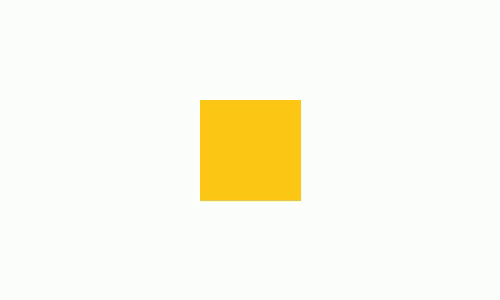

當前影格：3002.0


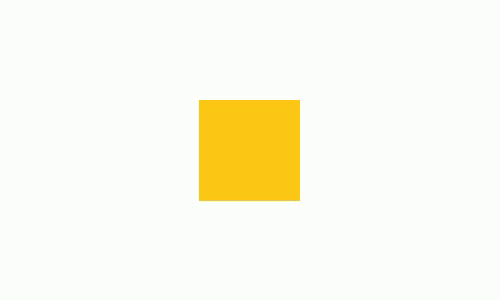

當前影格：3003.0


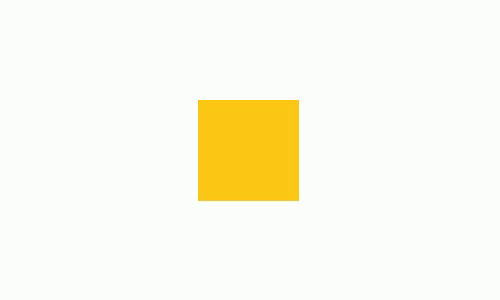

當前影格：3004.0


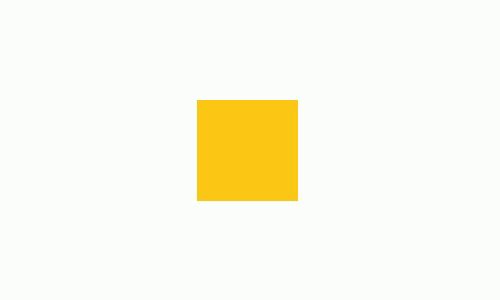

當前影格：3005.0


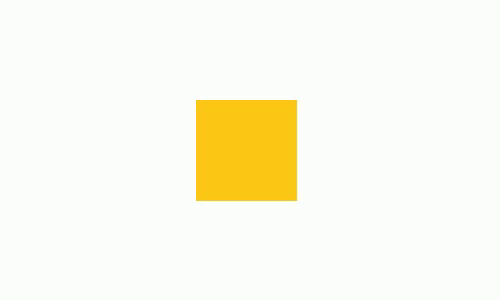

當前影格：3006.0


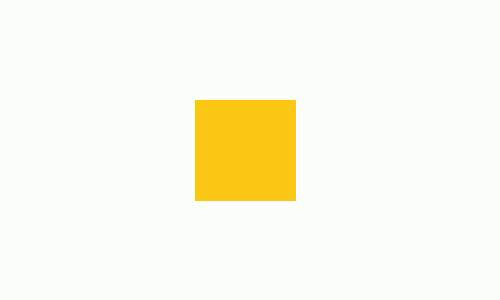

當前影格：3007.0


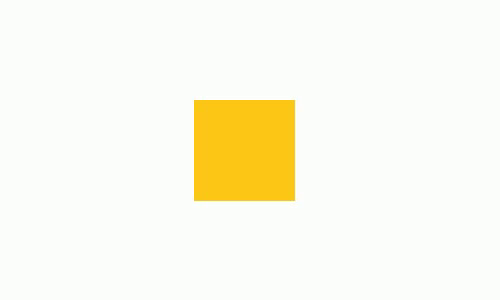

當前影格：3008.0


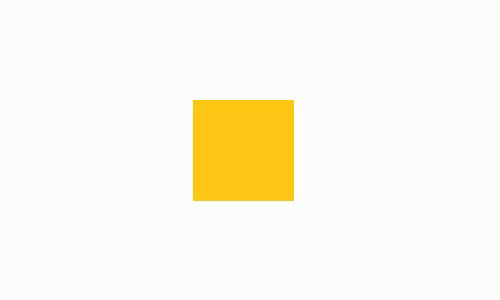

當前影格：3009.0


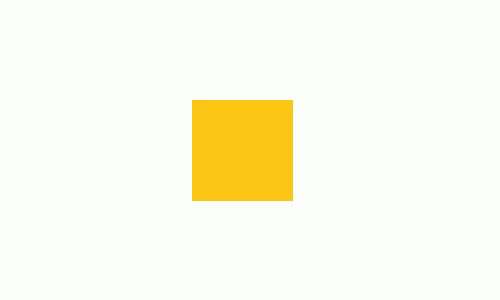

當前影格：3010.0


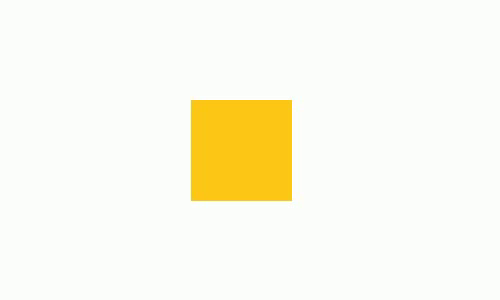

當前影格：3011.0


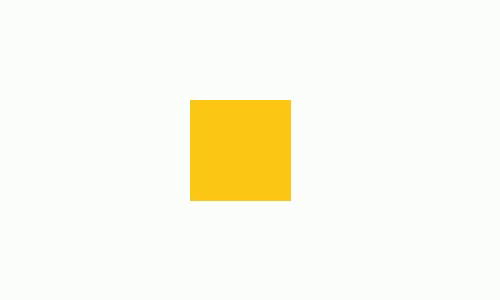

當前影格：3012.0


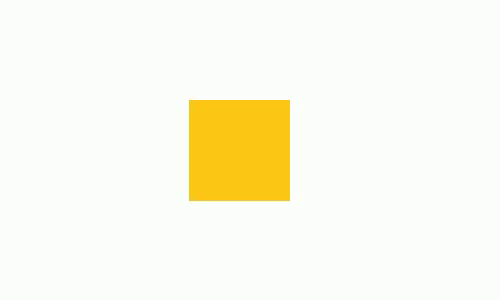

當前影格：3013.0


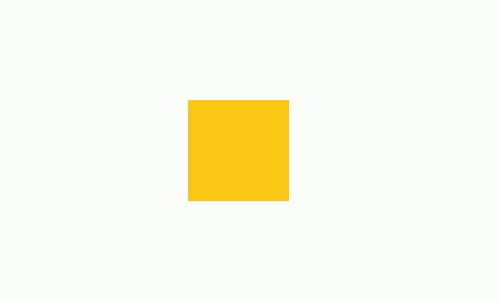

當前影格：3014.0


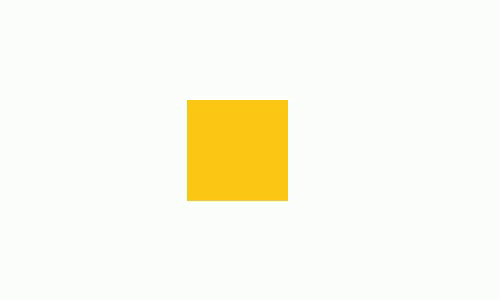

當前影格：3015.0


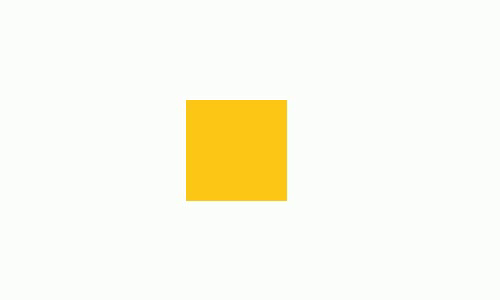

當前影格：3016.0


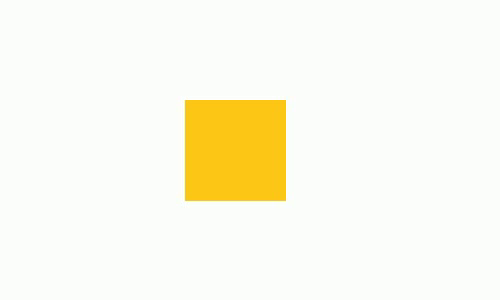

當前影格：3017.0


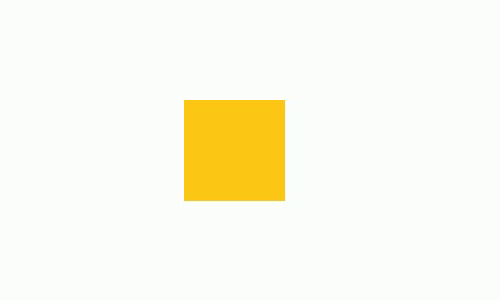

當前影格：3018.0


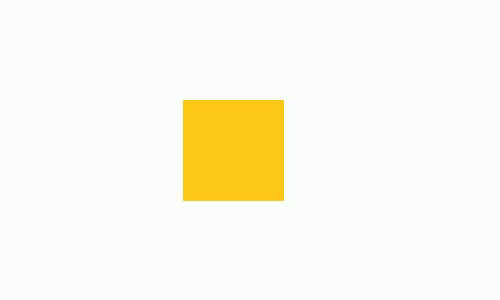

當前影格：3019.0


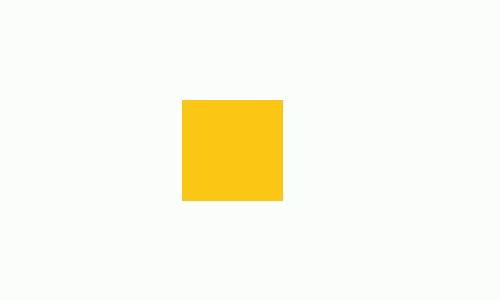

當前影格：3020.0


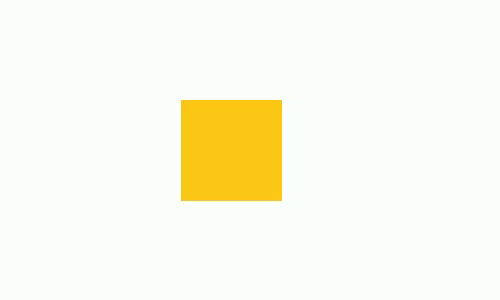

當前影格：3021.0


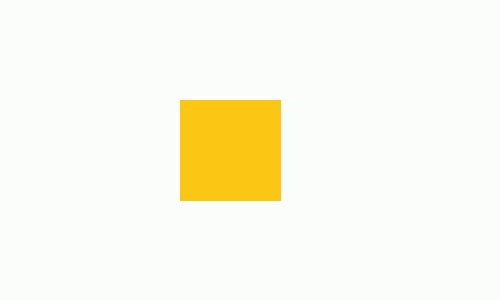

當前影格：3022.0


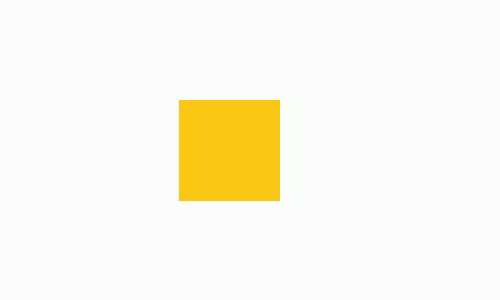

當前影格：3023.0


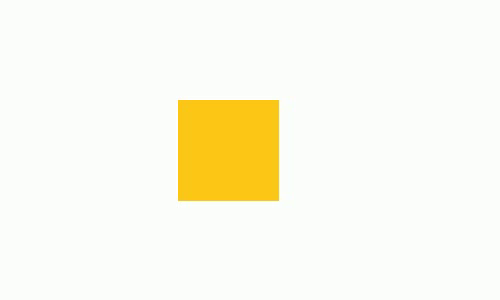

當前影格：3024.0


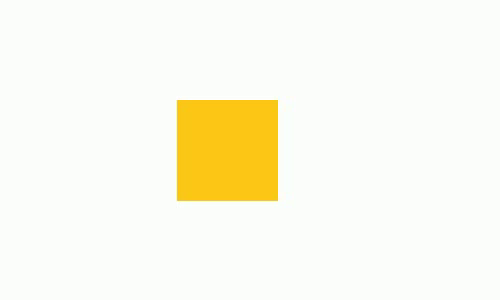

當前影格：3025.0


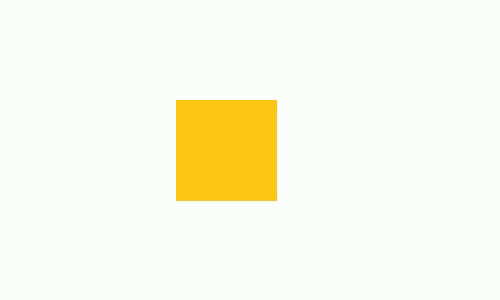

當前影格：3026.0


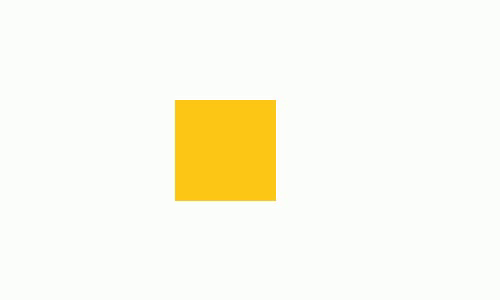

當前影格：3027.0


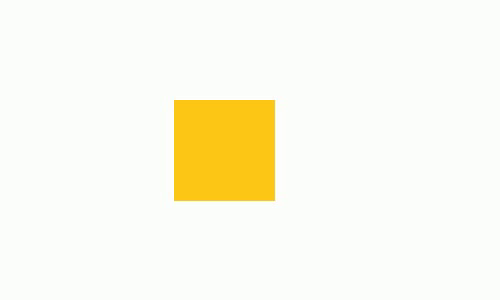

當前影格：3028.0


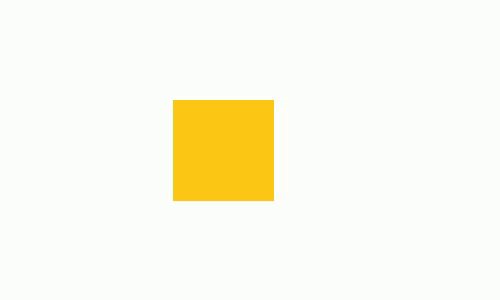

當前影格：3029.0


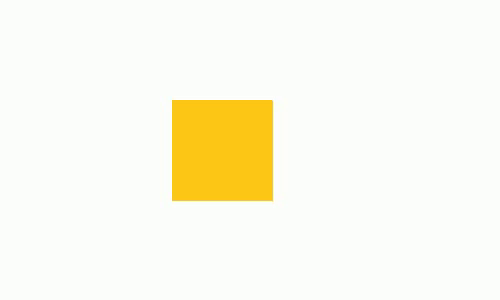

當前影格：3030.0


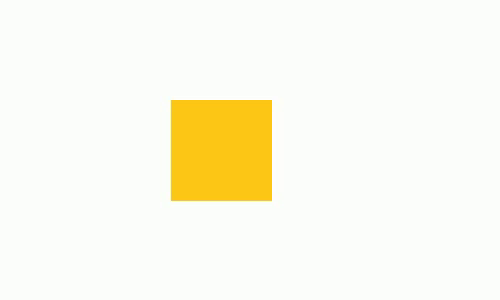

當前影格：3031.0


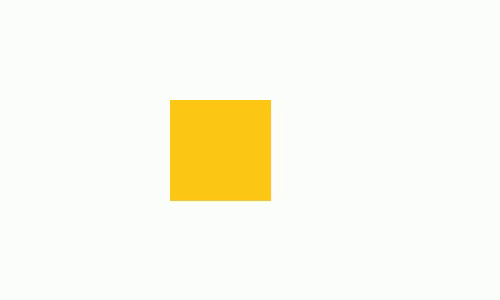

當前影格：3032.0


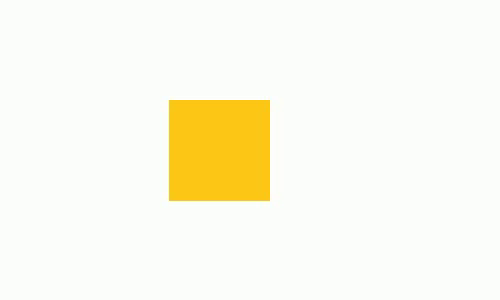

當前影格：3033.0


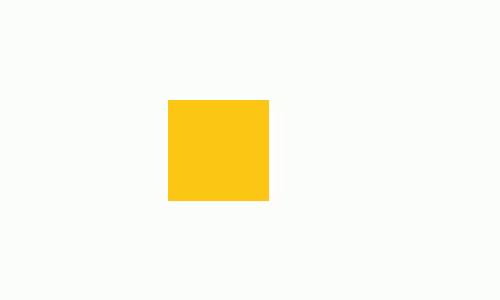

當前影格：3034.0


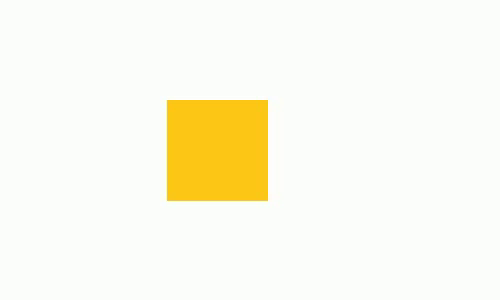

當前影格：3035.0


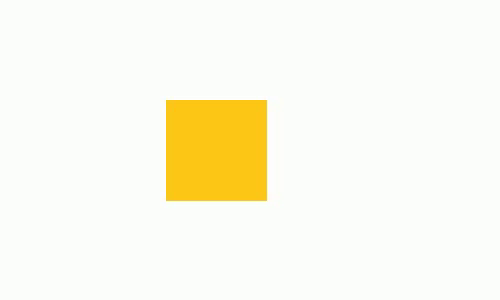

當前影格：3036.0


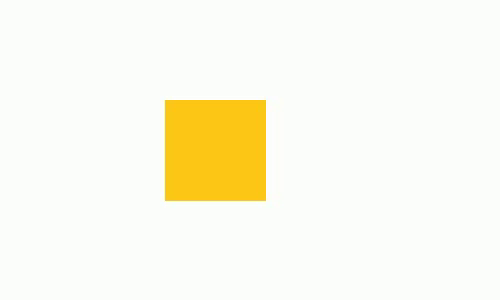

當前影格：3037.0


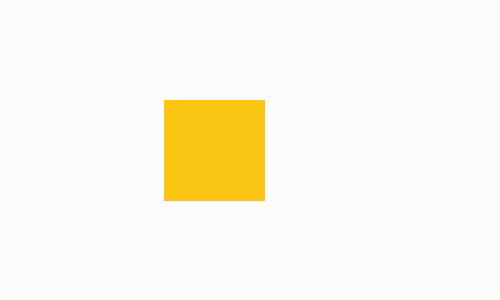

當前影格：3038.0


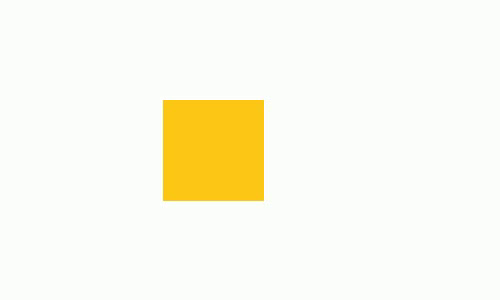

當前影格：3039.0


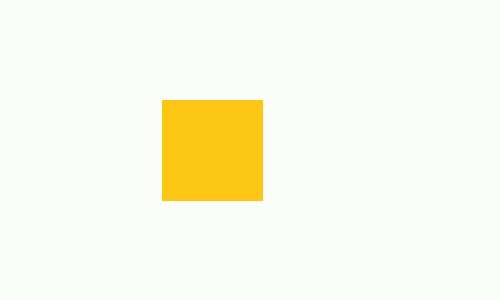

當前影格：3040.0


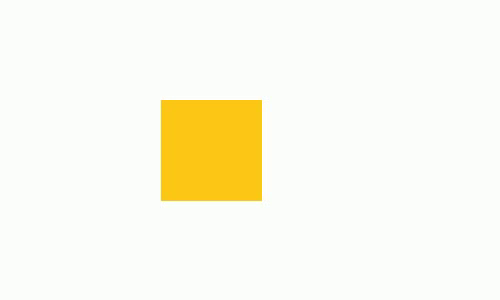

當前影格：3041.0


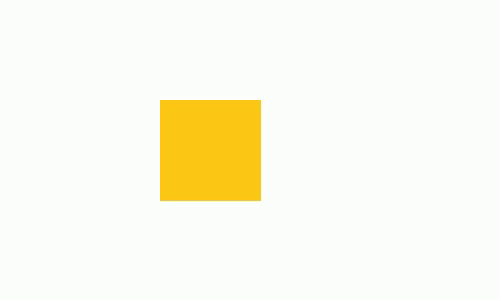

當前影格：3042.0


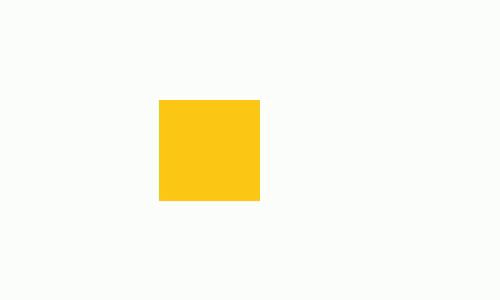

當前影格：3043.0


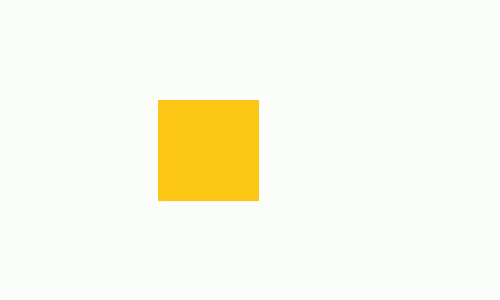

當前影格：3044.0


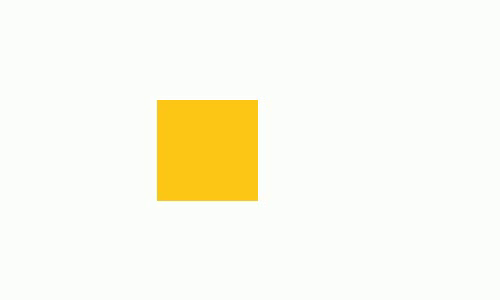

當前影格：3045.0


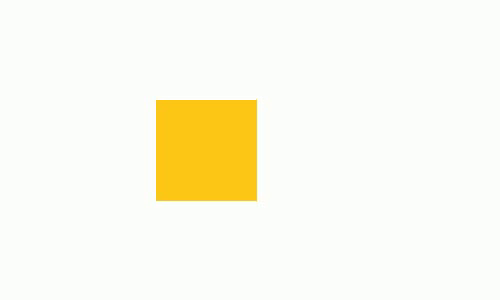

當前影格：3046.0


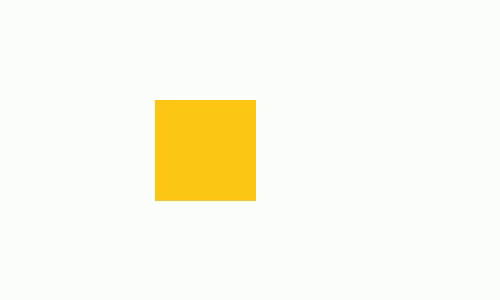

當前影格：3047.0


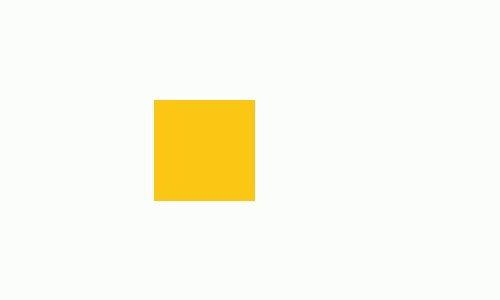

當前影格：3048.0


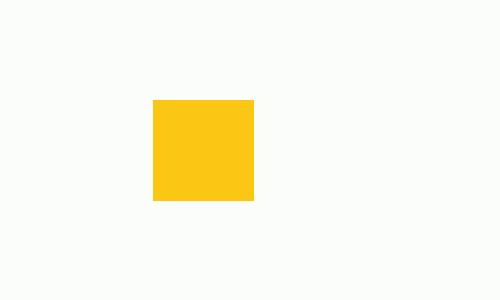

當前影格：3049.0


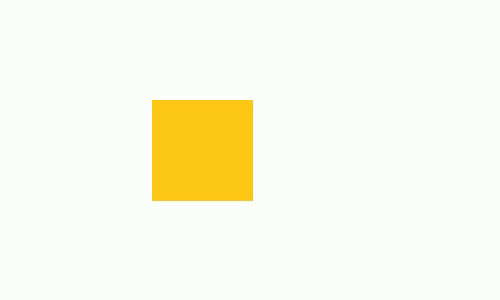

當前影格：3050.0


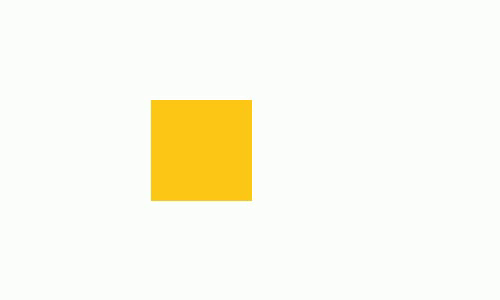

當前影格：3051.0


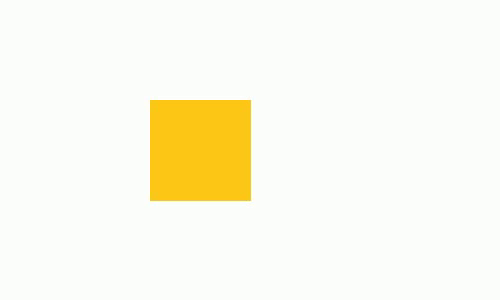

當前影格：3052.0


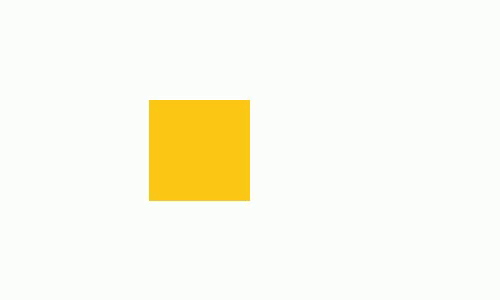

當前影格：3053.0


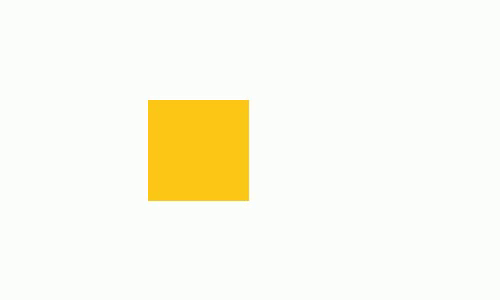

當前影格：3054.0


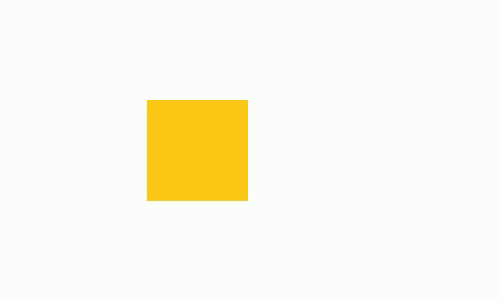

當前影格：3055.0


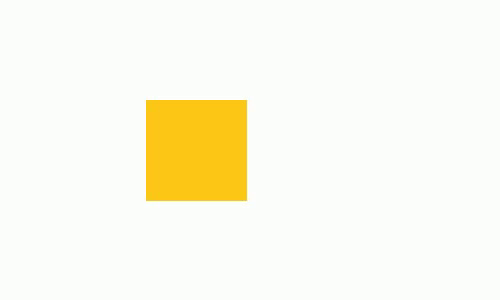

當前影格：3056.0


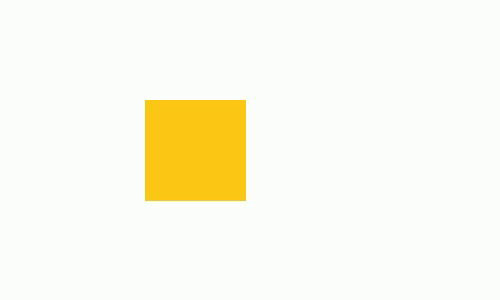

當前影格：3057.0


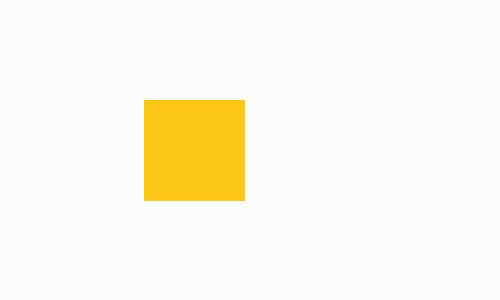

當前影格：3058.0


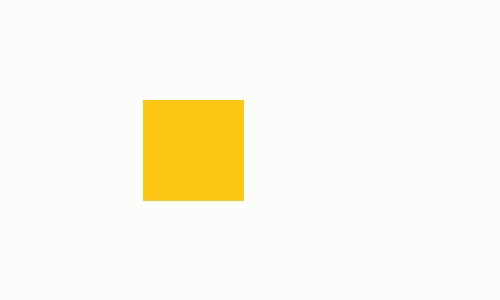

當前影格：3059.0


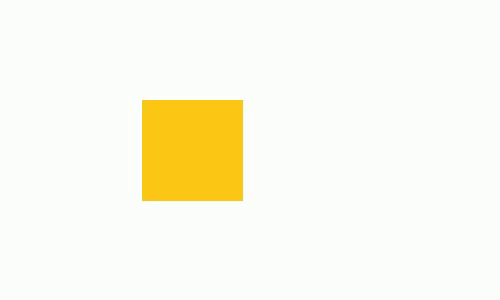

當前影格：3060.0


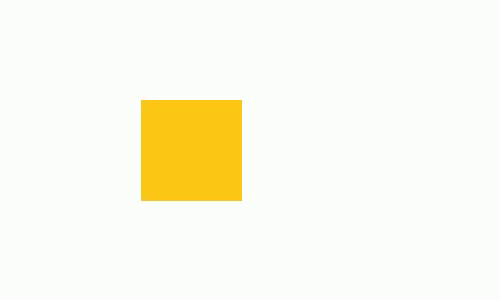

當前影格：3061.0


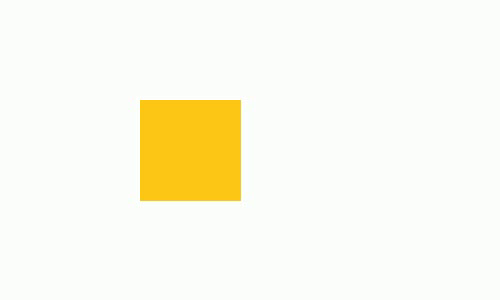

當前影格：3062.0


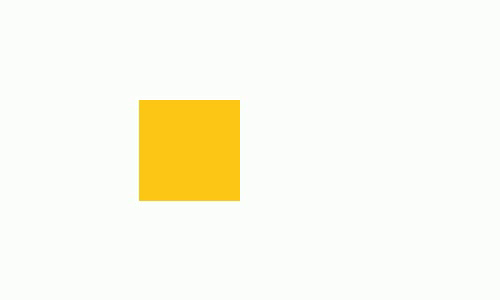

當前影格：3063.0


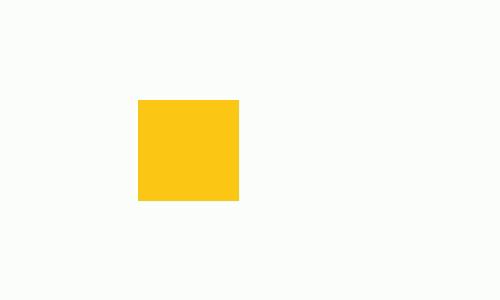

當前影格：3064.0


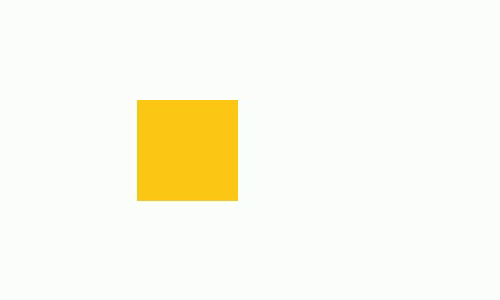

當前影格：3065.0


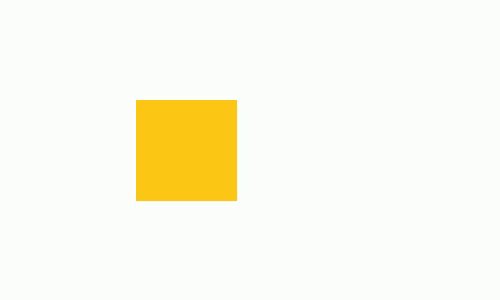

當前影格：3066.0


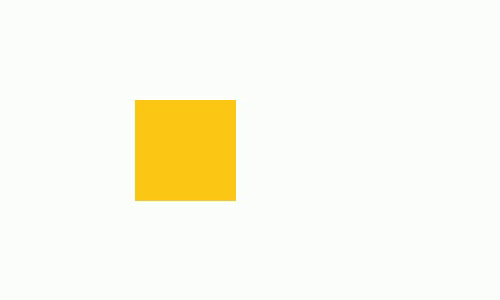

當前影格：3067.0


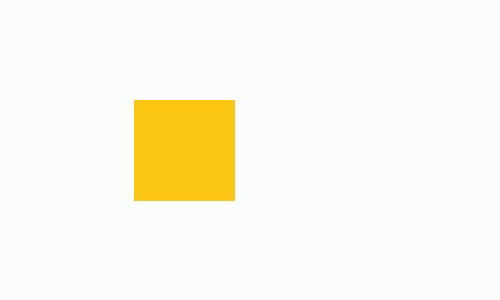

當前影格：3068.0


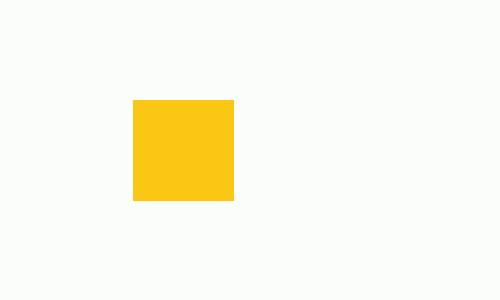

當前影格：3069.0


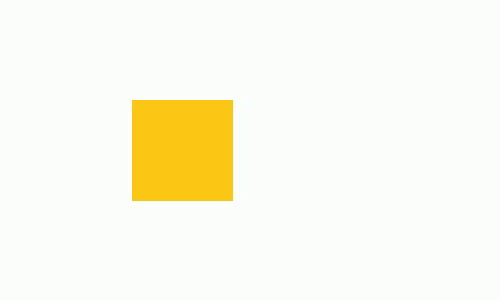

當前影格：3070.0


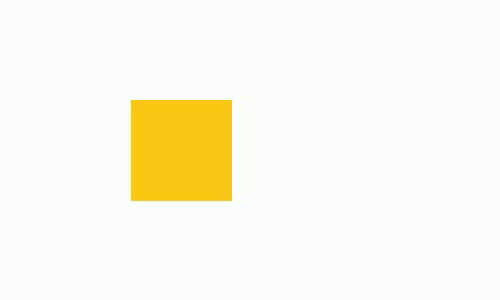

當前影格：3071.0


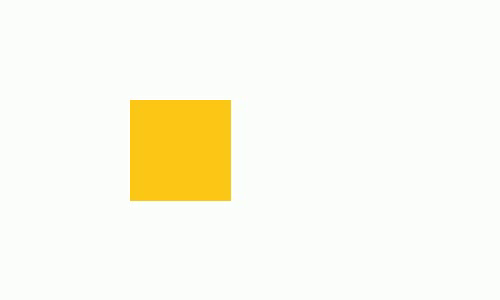

當前影格：3072.0


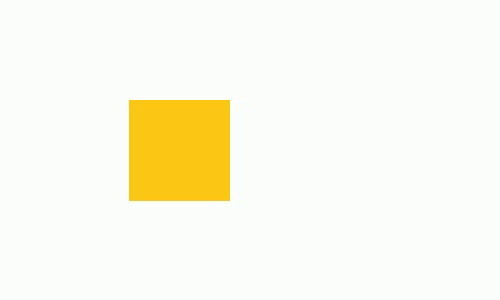

當前影格：3073.0


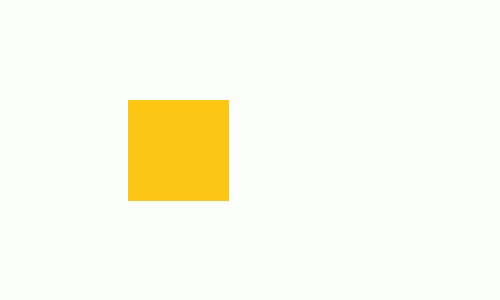

當前影格：3074.0


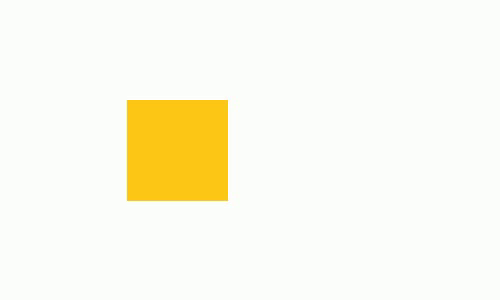

當前影格：3075.0


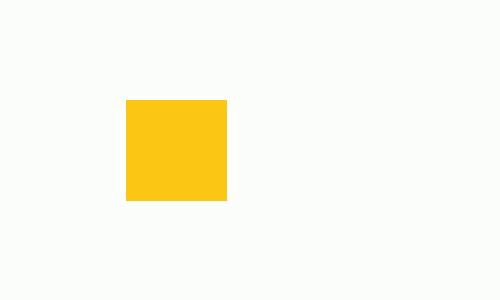

當前影格：3076.0


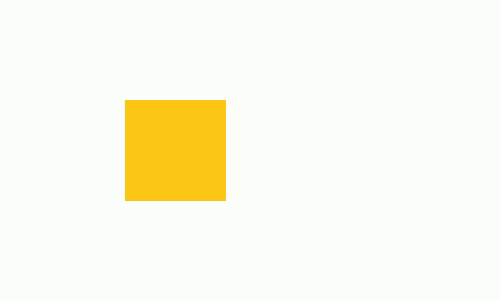

當前影格：3077.0


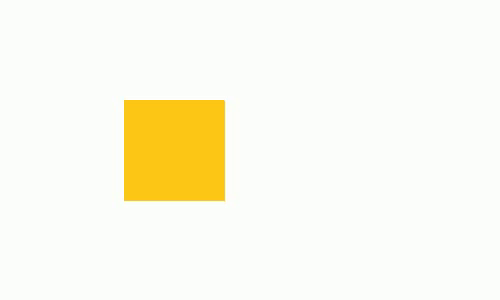

當前影格：3078.0


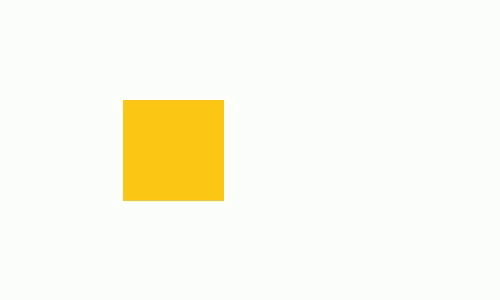

當前影格：3079.0


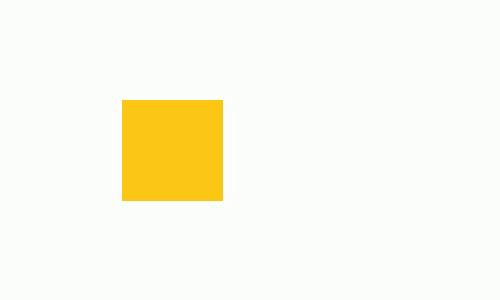

當前影格：3080.0


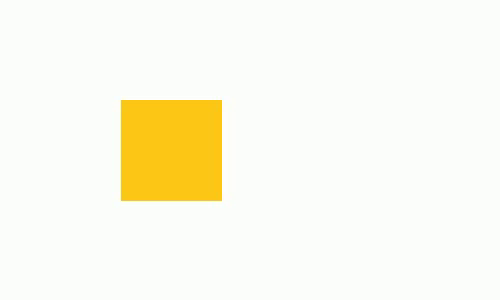

當前影格：3081.0


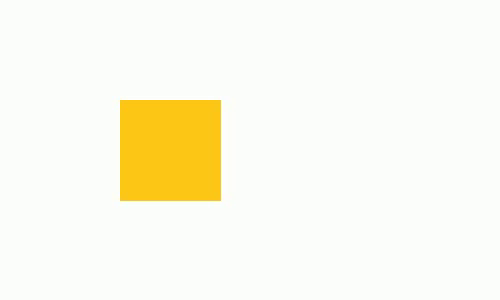

當前影格：3082.0


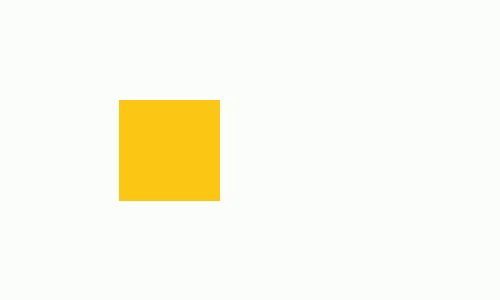

當前影格：3083.0


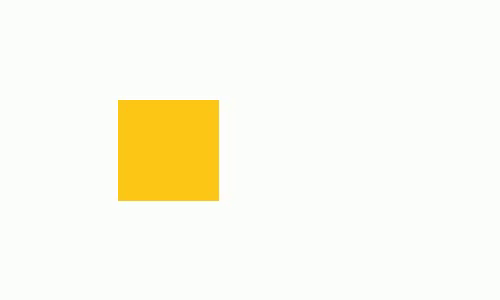

當前影格：3084.0


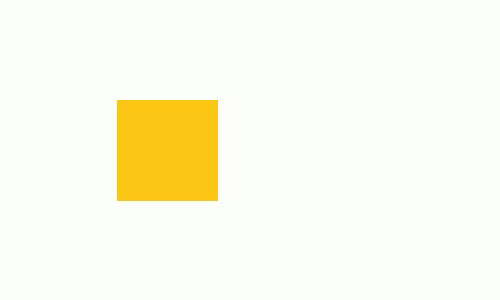

當前影格：3085.0


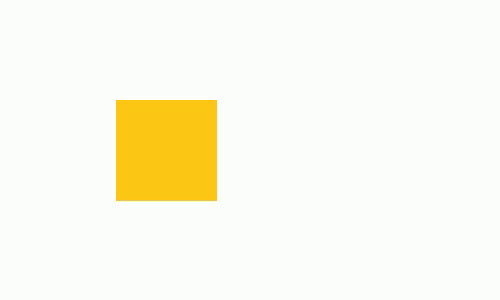

當前影格：3086.0


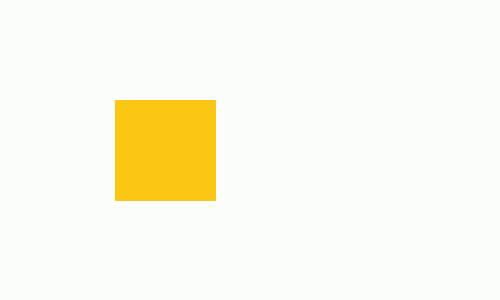

當前影格：3087.0


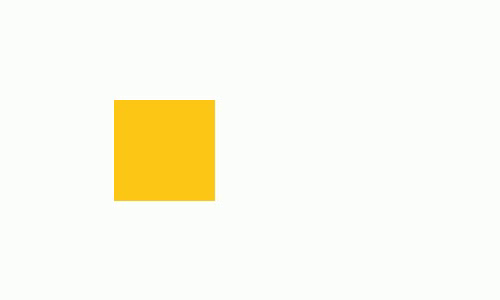

當前影格：3088.0


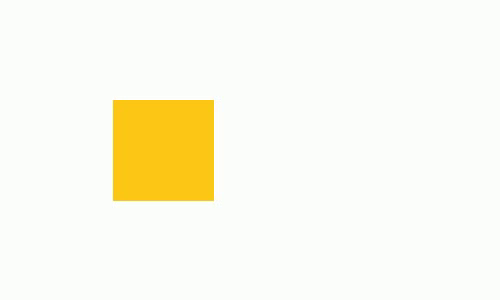

當前影格：3089.0


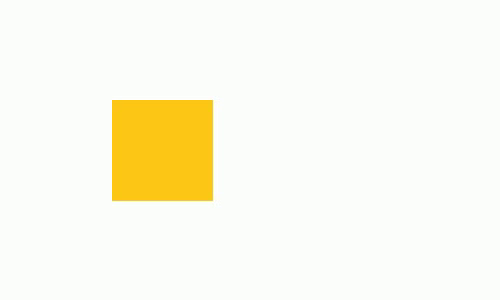

當前影格：3090.0


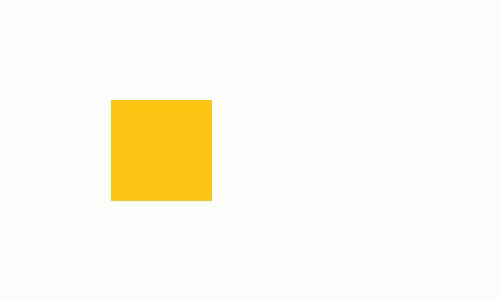

當前影格：3091.0


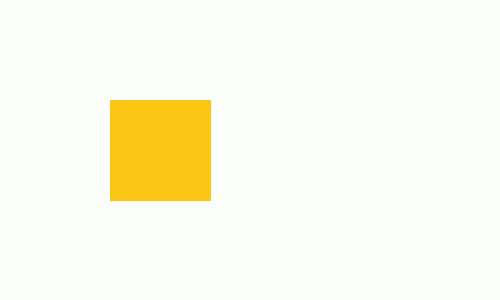

當前影格：3092.0


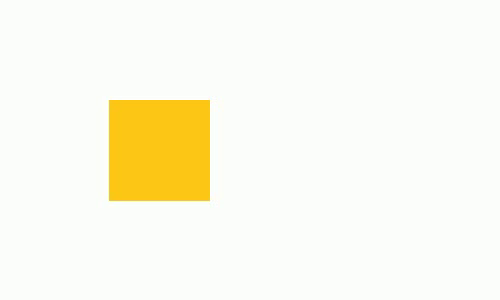

當前影格：3093.0


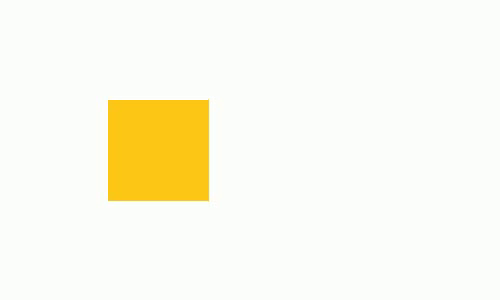

當前影格：3094.0


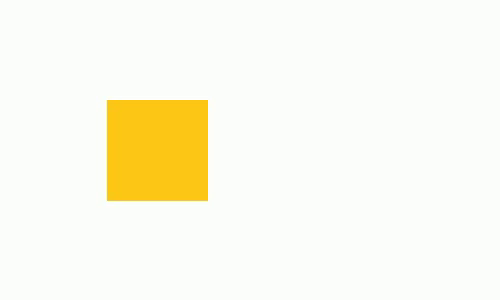

當前影格：3095.0


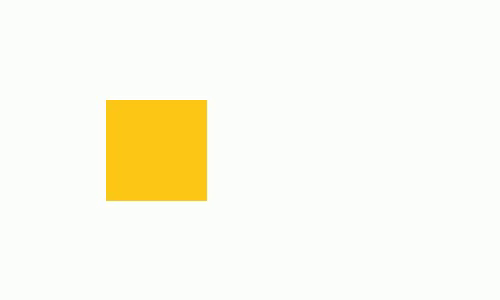

當前影格：3096.0


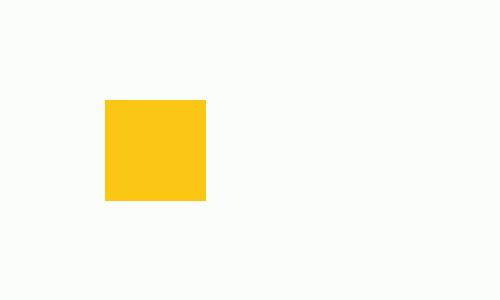

當前影格：3097.0


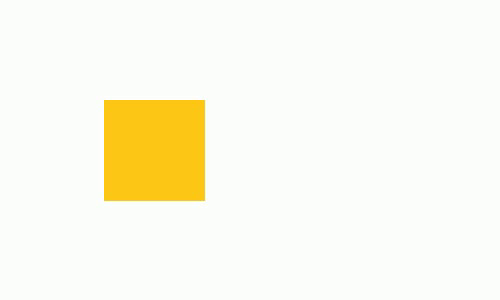

當前影格：3098.0


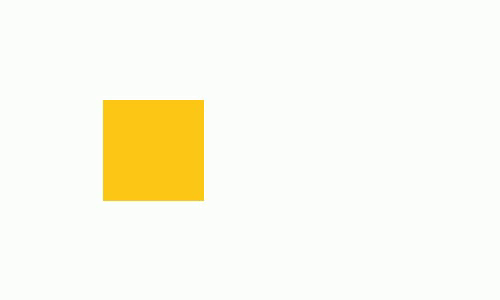

當前影格：3099.0


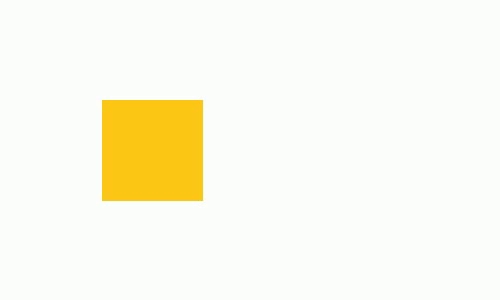

當前影格：3100.0


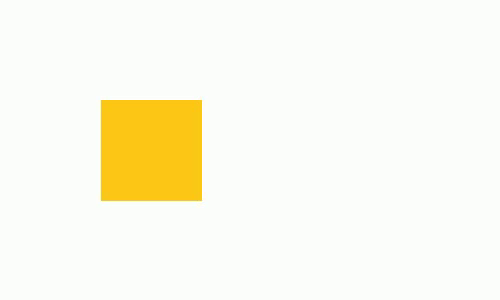

當前影格：3101.0


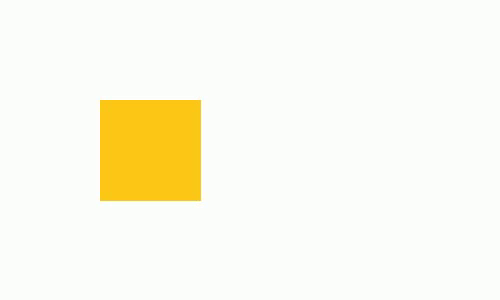

當前影格：3102.0


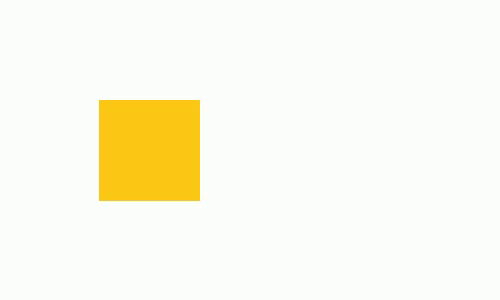

當前影格：3103.0


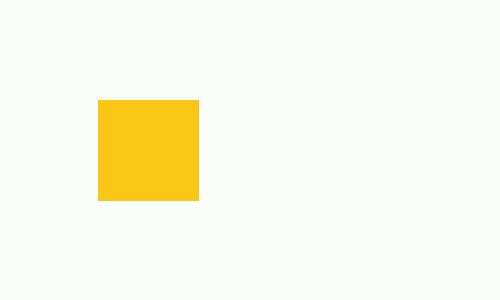

當前影格：3104.0


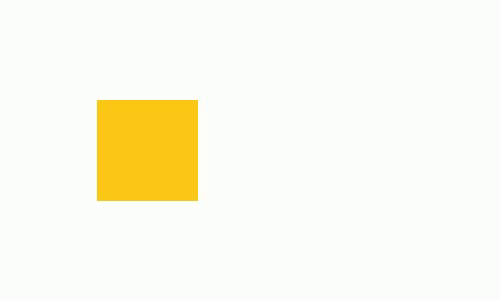

當前影格：3105.0


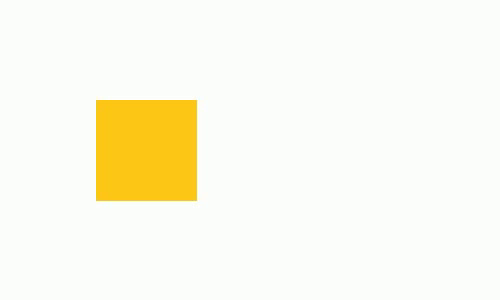

當前影格：3106.0


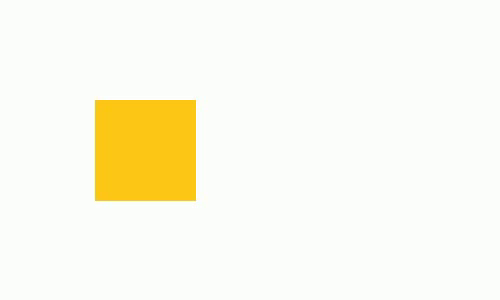

當前影格：3107.0


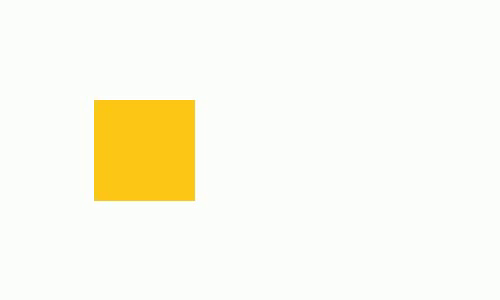

當前影格：3108.0


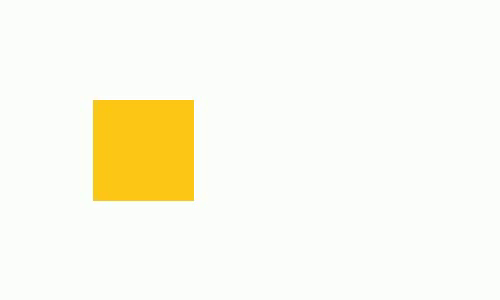

當前影格：3109.0


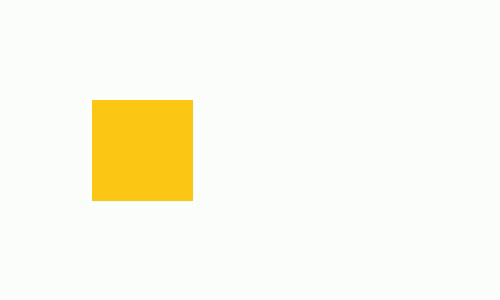

當前影格：3110.0


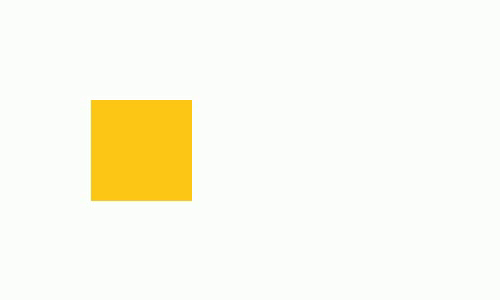

當前影格：3111.0


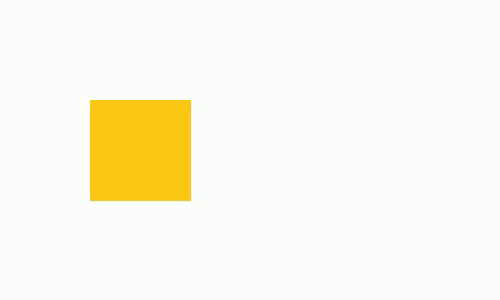

當前影格：3112.0


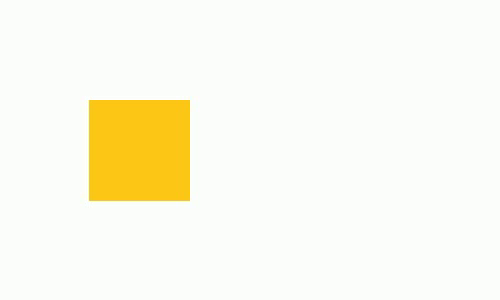

當前影格：3113.0


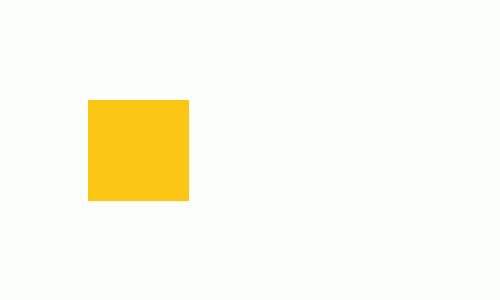

當前影格：3114.0


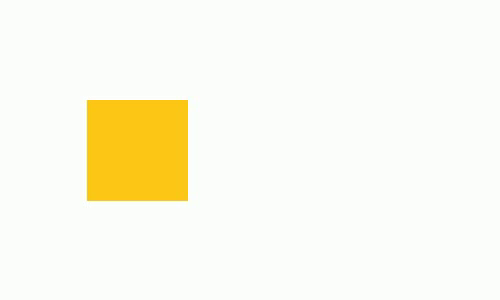

當前影格：3115.0


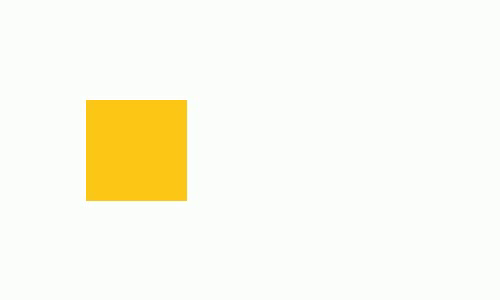

當前影格：3116.0


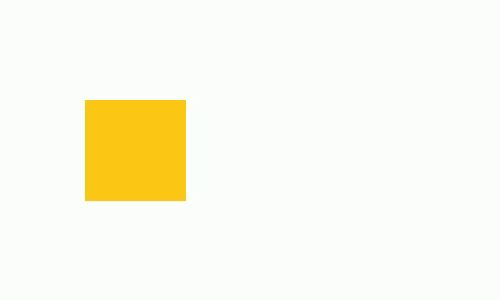

當前影格：3117.0


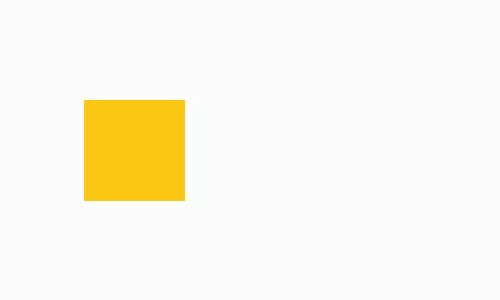

當前影格：3118.0


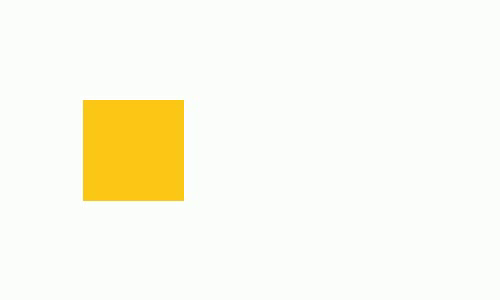

當前影格：3119.0


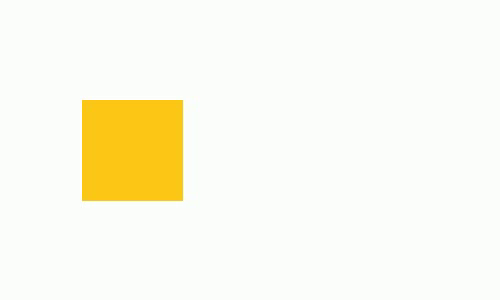

當前影格：3120.0


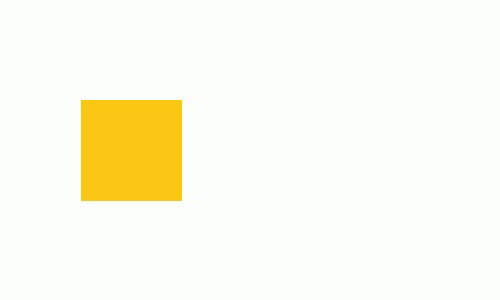

當前影格：3121.0


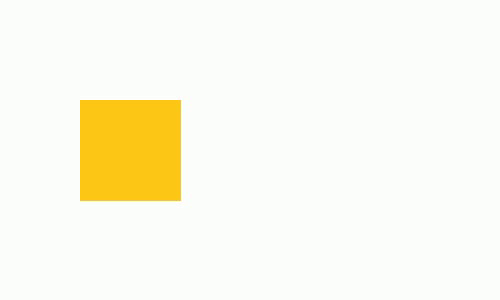

當前影格：3122.0


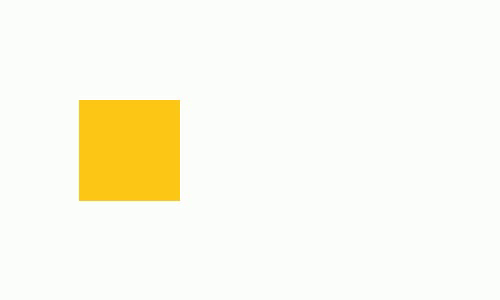

當前影格：3123.0


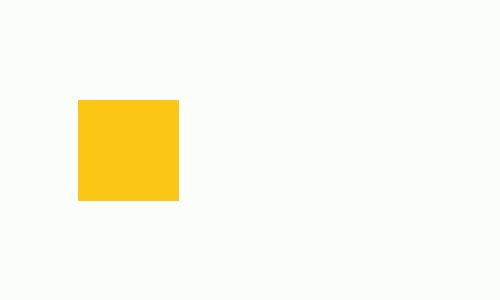

當前影格：3124.0


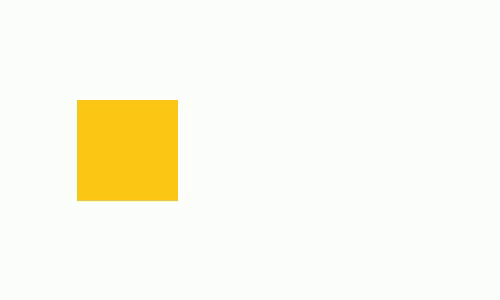

當前影格：3125.0


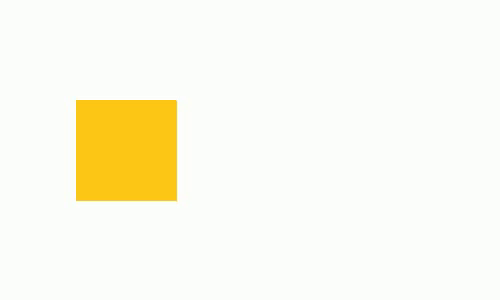

當前影格：3126.0


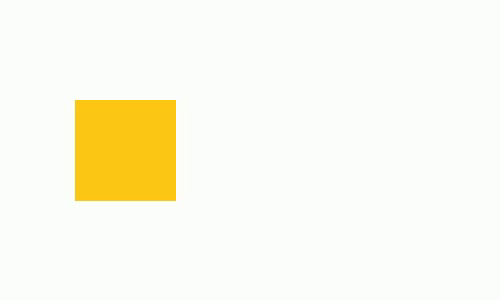

當前影格：3127.0


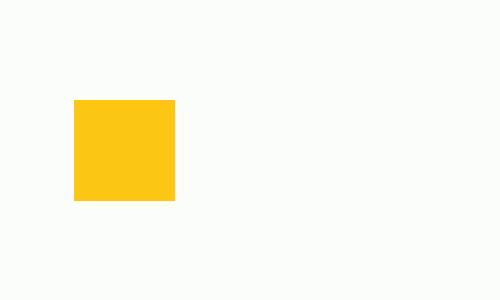

當前影格：3128.0


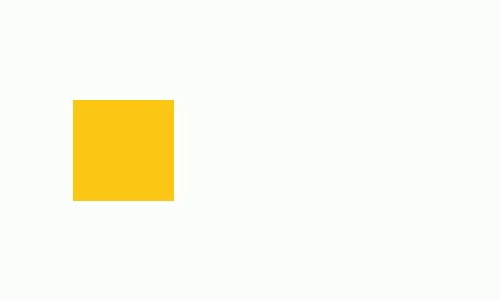

當前影格：3129.0


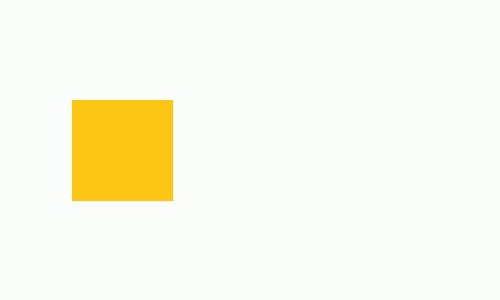

當前影格：3130.0


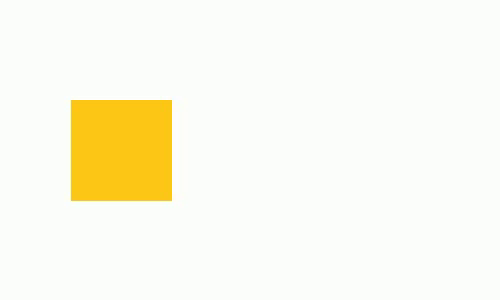

當前影格：3131.0


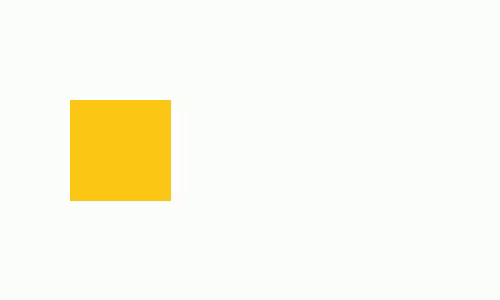

當前影格：3132.0


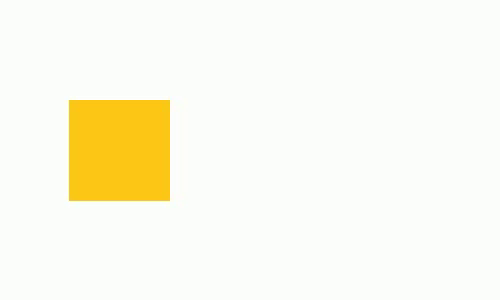

當前影格：3133.0


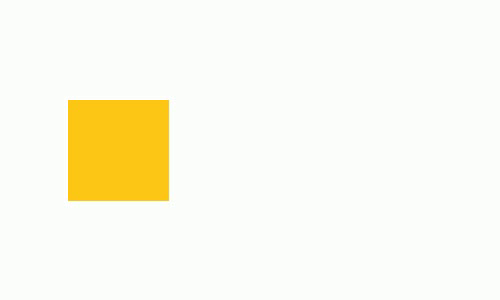

當前影格：3134.0


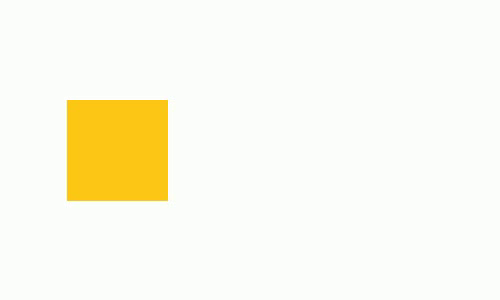

當前影格：3135.0


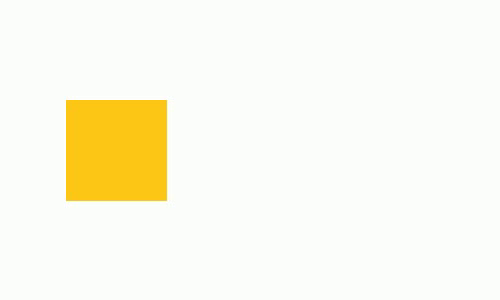

當前影格：3136.0


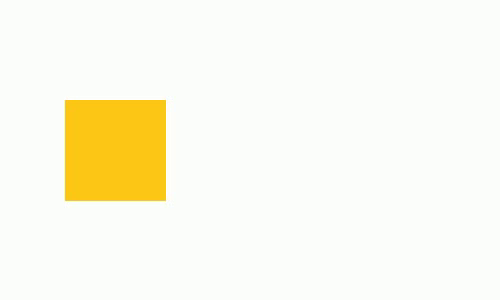

當前影格：3137.0


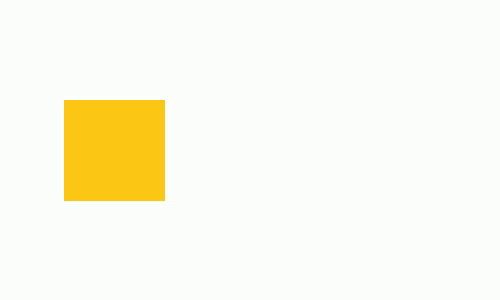

當前影格：3138.0


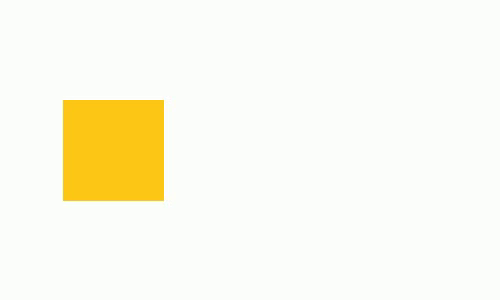

當前影格：3139.0


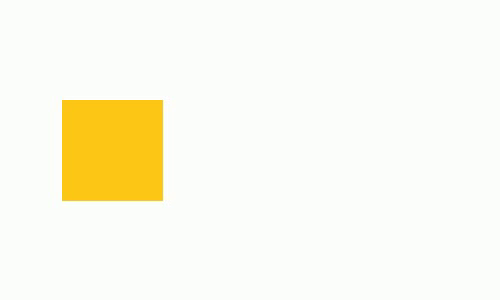

當前影格：3140.0


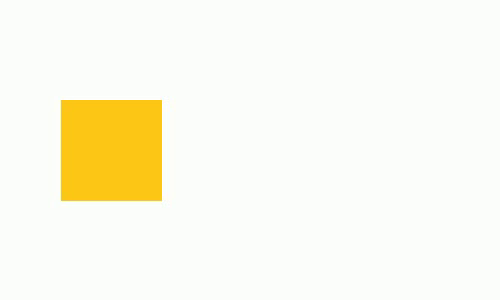

當前影格：3141.0


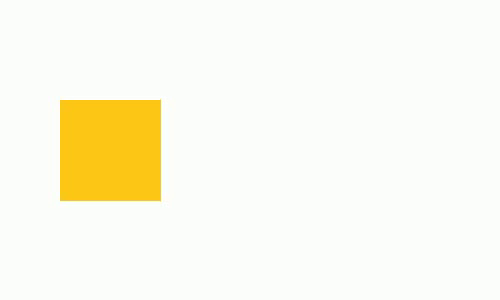

當前影格：3142.0


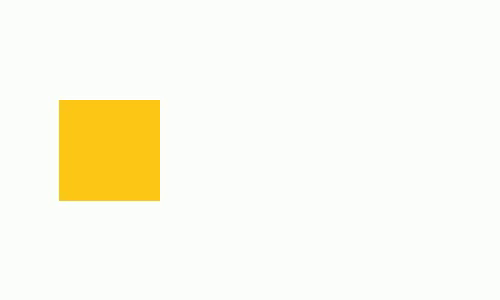

當前影格：3143.0


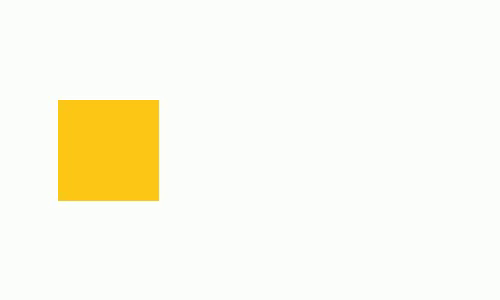

當前影格：3144.0


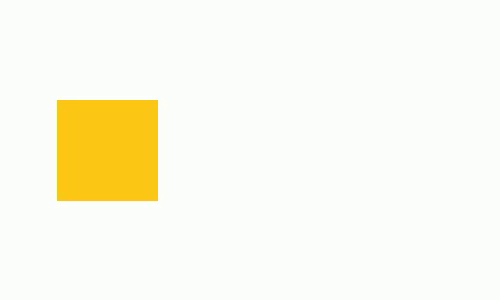

當前影格：3145.0


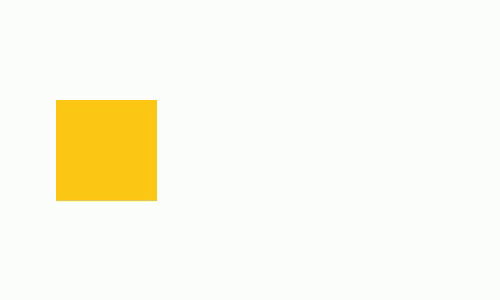

當前影格：3146.0


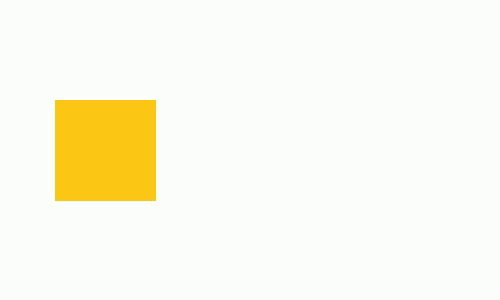

當前影格：3147.0


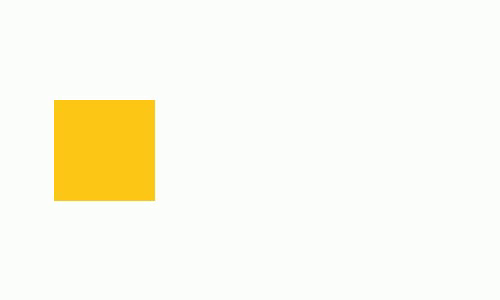

當前影格：3148.0


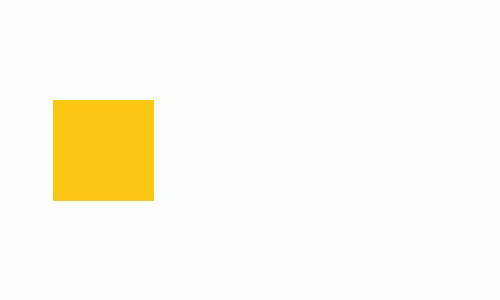

當前影格：3149.0


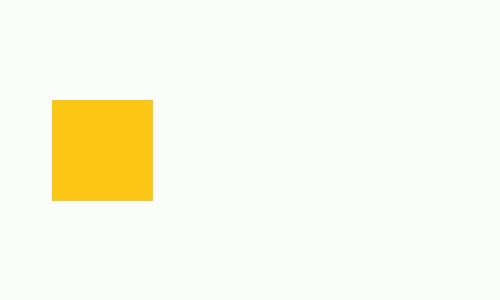

當前影格：3150.0


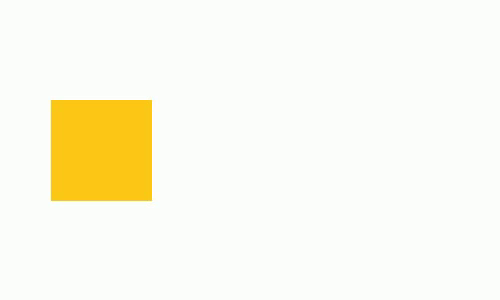

當前影格：3151.0


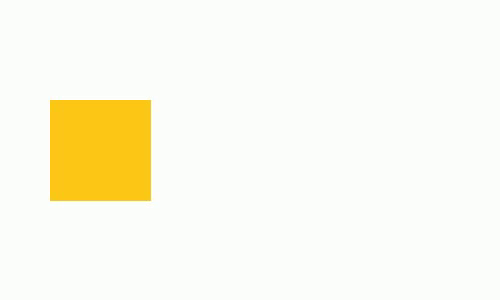

當前影格：3152.0


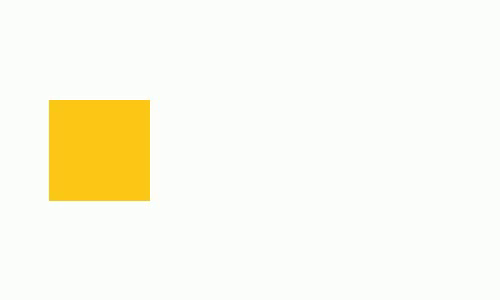

當前影格：3153.0


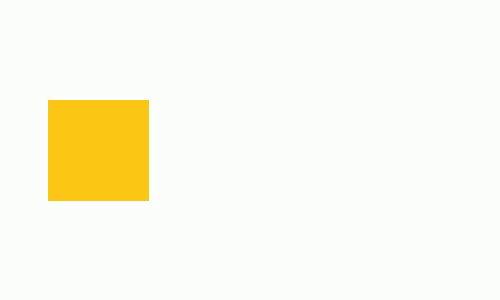

當前影格：3154.0


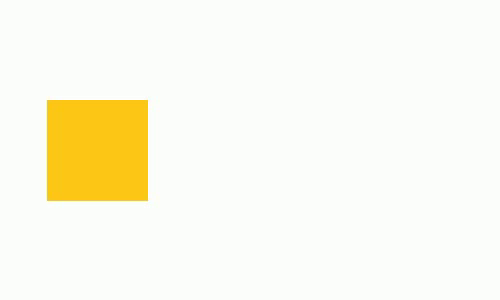

當前影格：3155.0


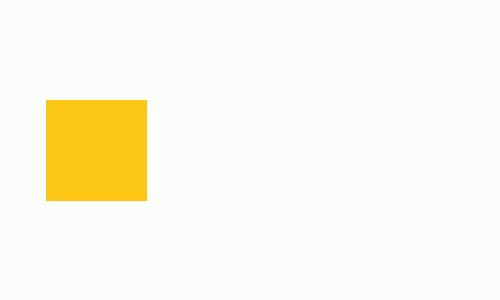

當前影格：3156.0


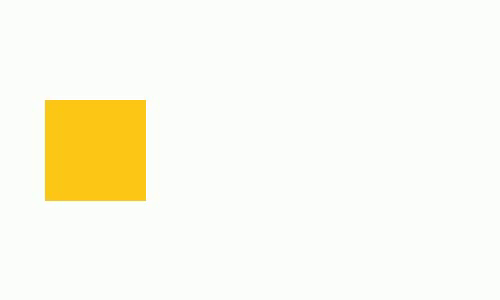

當前影格：3157.0


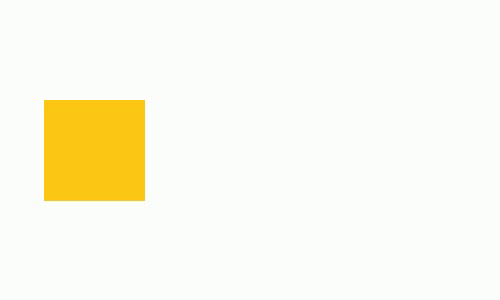

當前影格：3158.0


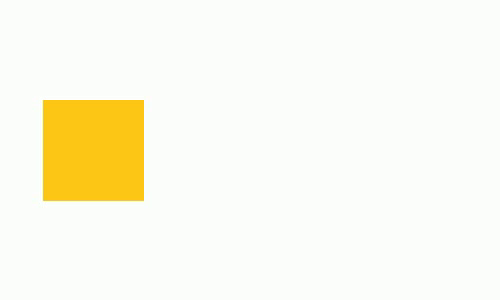

當前影格：3159.0


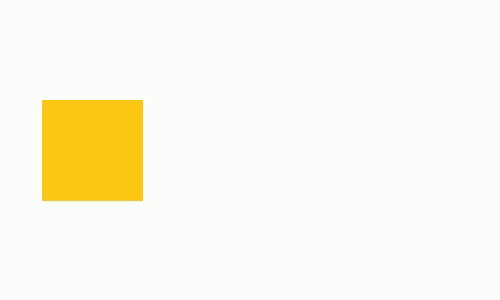

當前影格：3160.0


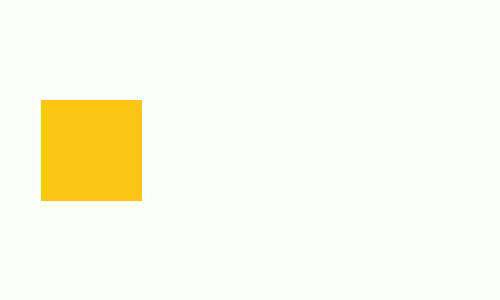

當前影格：3161.0


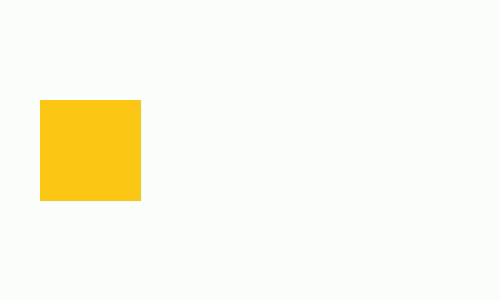

當前影格：3162.0


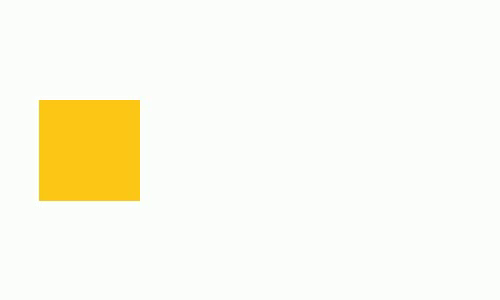

當前影格：3163.0


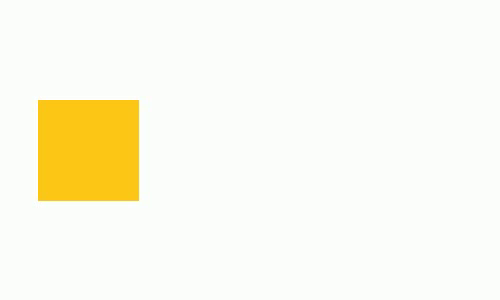

當前影格：3164.0


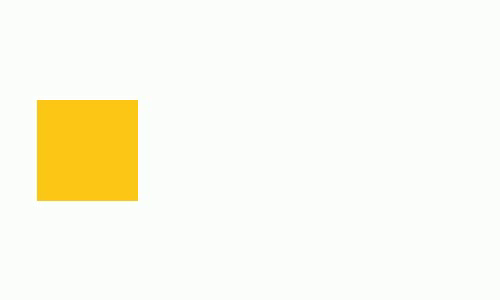

當前影格：3165.0


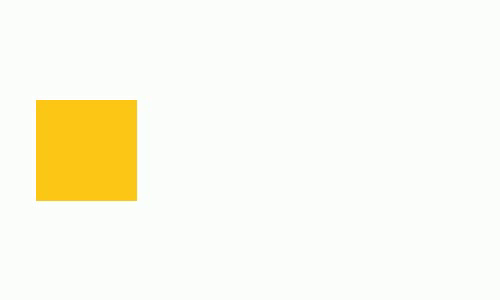

當前影格：3166.0


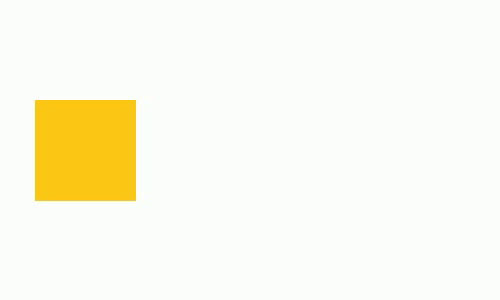

當前影格：3167.0


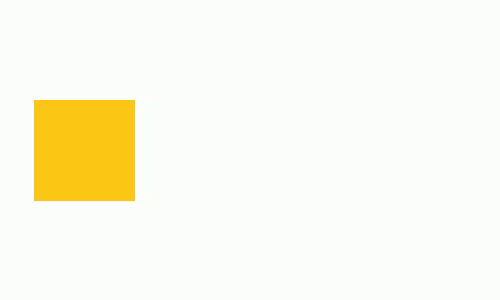

當前影格：3168.0


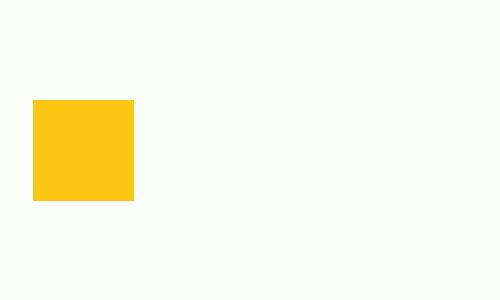

當前影格：3169.0


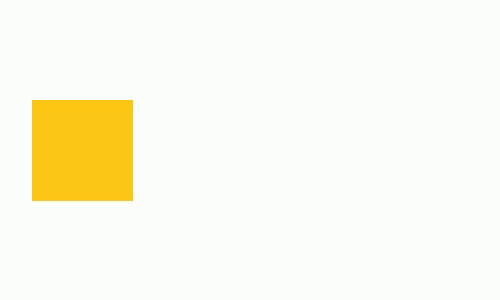

當前影格：3170.0


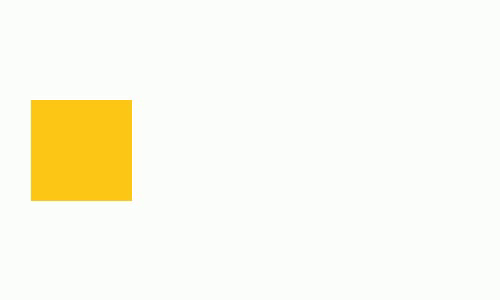

當前影格：3171.0


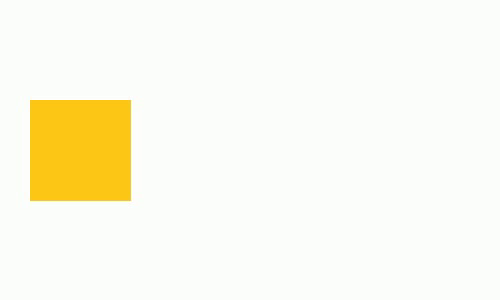

當前影格：3172.0


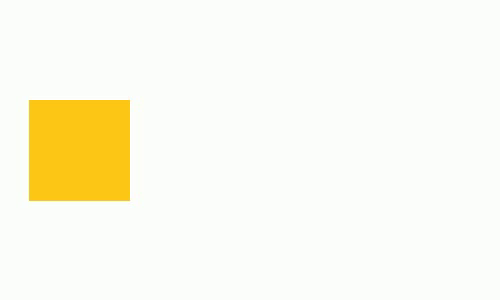

當前影格：3173.0


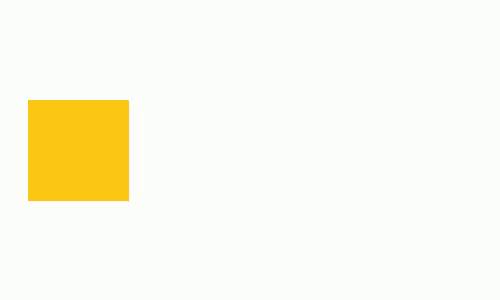

當前影格：3174.0


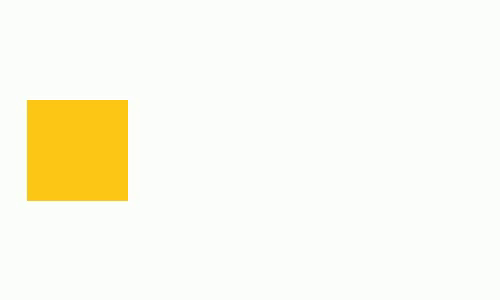

當前影格：3175.0


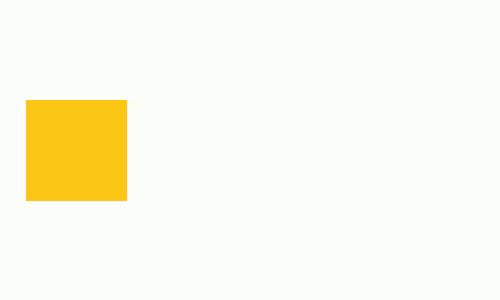

當前影格：3176.0


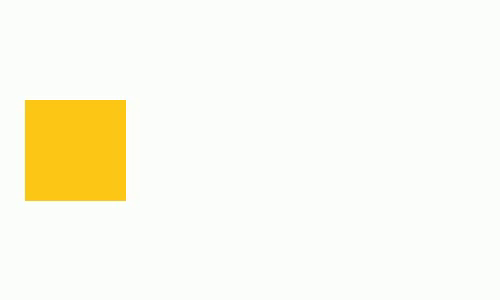

當前影格：3177.0


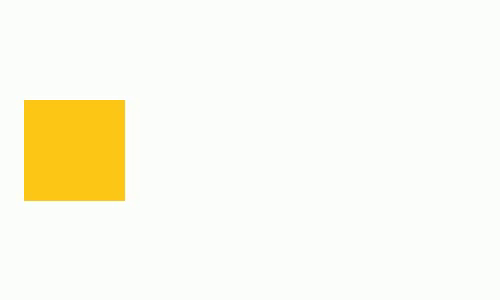

當前影格：3178.0


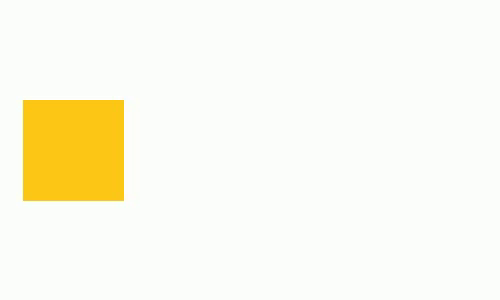

當前影格：3179.0


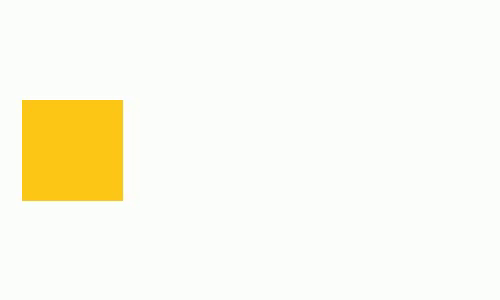

當前影格：3180.0


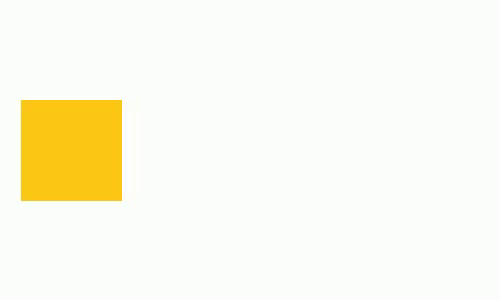

當前影格：3181.0


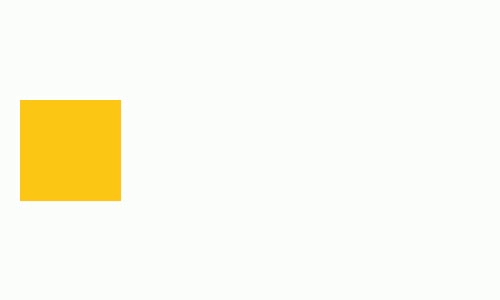

當前影格：3182.0


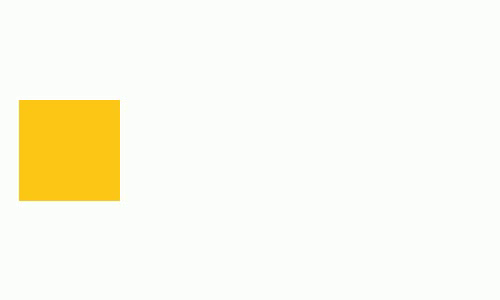

當前影格：3183.0


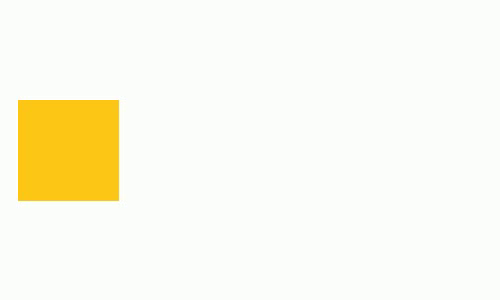

當前影格：3184.0


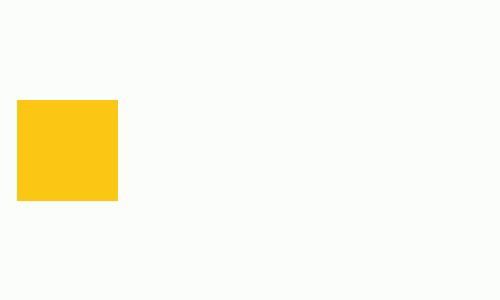

當前影格：3185.0


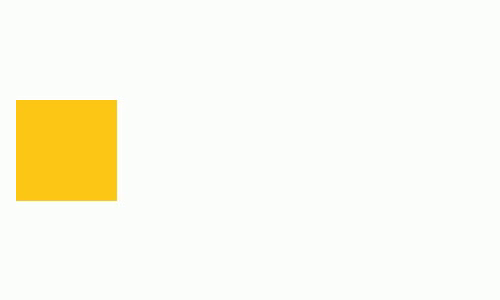

當前影格：3186.0


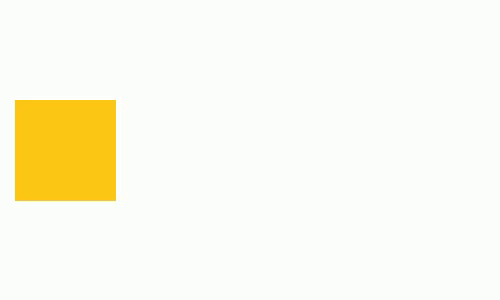

當前影格：3187.0


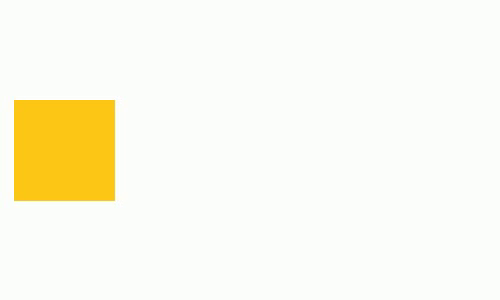

當前影格：3188.0


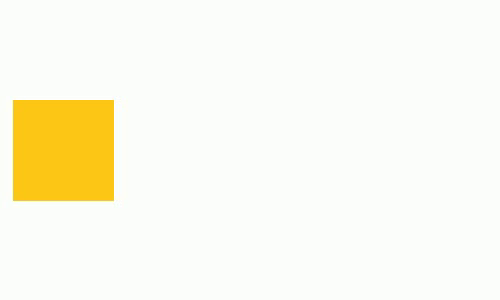

當前影格：3189.0


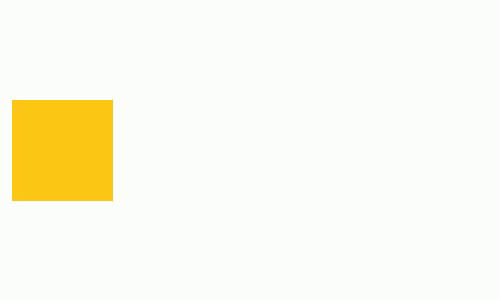

當前影格：3190.0


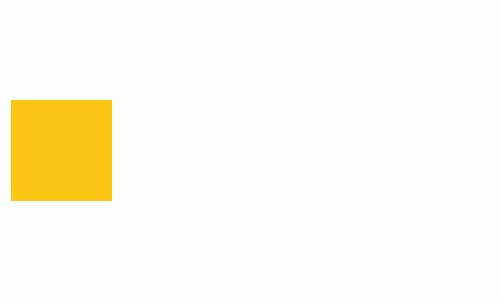

當前影格：3191.0


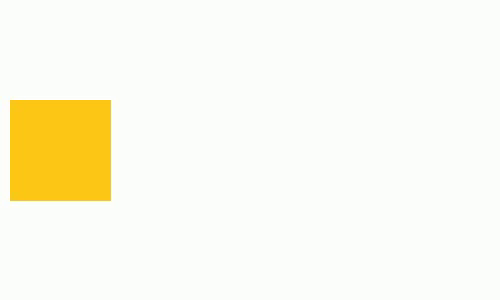

當前影格：3192.0


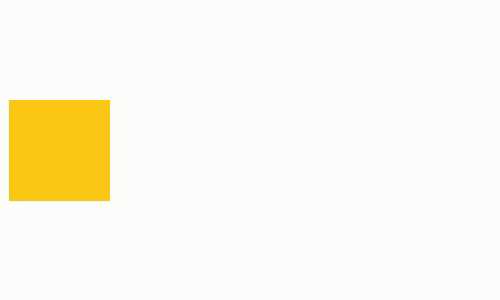

當前影格：3193.0


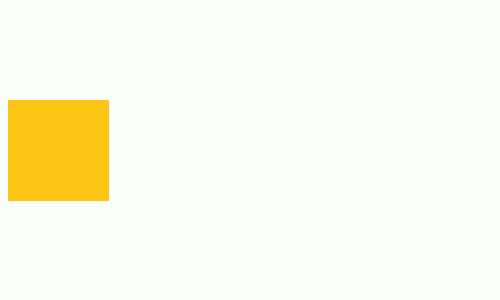

當前影格：3194.0


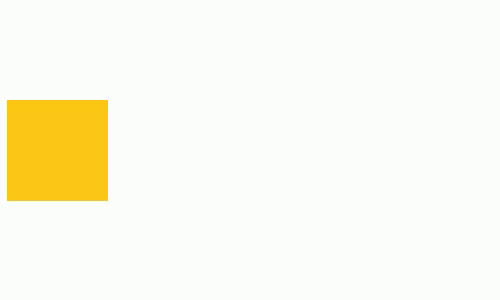

當前影格：3195.0


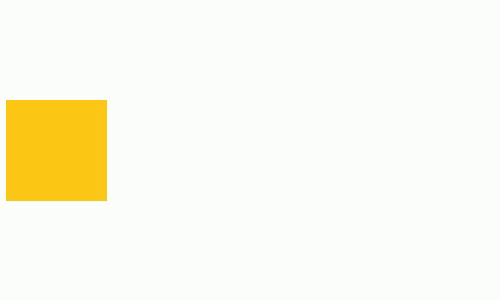

當前影格：3196.0


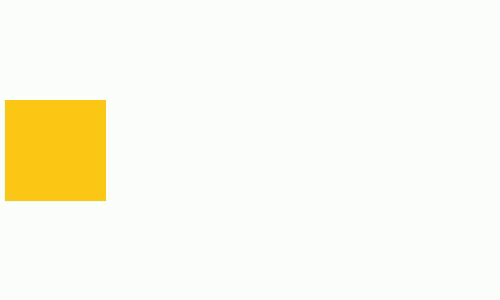

當前影格：3197.0


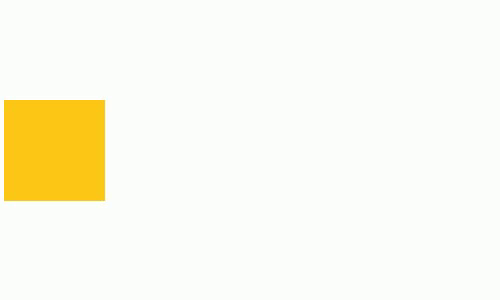

當前影格：3198.0


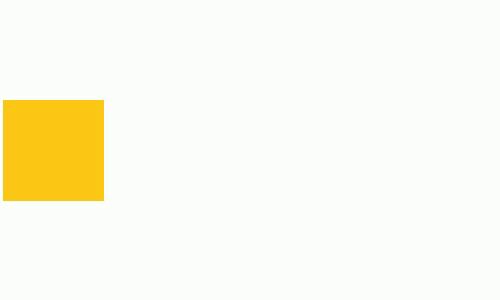

當前影格：3199.0


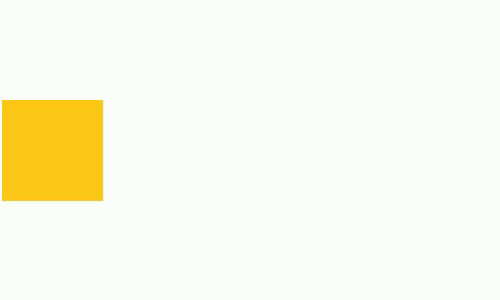

當前影格：3200.0


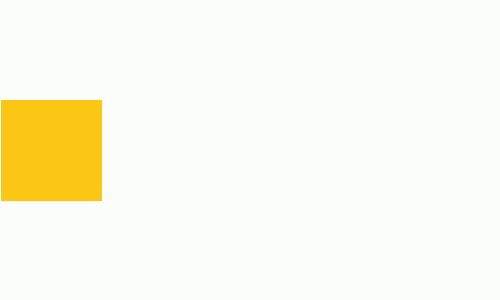

當前影格：3200.0


In [13]:
import cv2
from google.colab.patches import cv2_imshow

vedio = cv2.VideoCapture("1.mp4")

print(f"寬：{vedio.get(3)}")#功能參數3=寬 
print(f"高：{vedio.get(4)}")#功能參數4=高
print(f"每秒影格數：{vedio.get(5)}")#5=每秒影格
print(f"影片總影格：{vedio.get(7)}")#7=影片總影格
vedio.set(1,3000)#設定set當前影格(1)從3000開始
while vedio.isOpened() == True:
  ret,m_1 = vedio.read()#會回傳布林值與圖片參數
  print(f"當前影格：{vedio.get(1)}")
  if ret == True:
    cv2_imshow(m_1)
    pass
  else:
    break

#將影片拆分成圖片